Задачи на проект: 
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_63/1500642961.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Подготовка данных

In [2]:
# прочитаем фаил с гипотезами
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)
hypothesis.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach','Impact' :'impact','Confidence': 'confidence','Efforts' :'efforts'}, inplace=True)
hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# загрузим данные о заказах и посетителях
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Таблица orders

In [4]:
# обзор таблицы orders
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# поменяем формат столбца с датами
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
# проверим на дубликаты
orders.duplicated().sum()

0

## Таблица visitors

In [7]:
# обзор таблицы visitors
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пропусков нет, нужно поменять тип данных в столбце date

In [8]:
# поменяем формат столбца с датами
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# проверим на дубликаты
visitors.duplicated().sum()

0

## Проверка пользователей, оказавшихся в двух группах сразу

In [10]:
#создадим два списка, в которых сохраним ID пользователей, попавших в каждую из групп
list_a = []
list_b = []
for i in range(len(orders['visitorId'])):
    if orders['group'][i] == 'A':
        list_a.append(orders['visitorId'][i])
    else:
        list_b.append(orders['visitorId'][i])

# в список result занесем ID пользователей, присутствующих в обоих списках

result=list(set(list_a) & set(list_b))
print(len(result)) # посчитаем их количество

58


In [11]:
# так как число "задвоенных" пользователей - около 5% от всего датасета, то уберем их из расчетов
orders = orders.query("visitorId not in @result")
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


# Часть 1. Приоритизация гипотез.

## Фреймворк ICE

In [12]:
# применим фреймворк ICE для оценки приоритета гипотез

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis.sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


8 гипотеза - самая перспективная, следом идут 0,7,6 и 2. Проверим приоритезацию по фреймворку RICE

## Фреймворк RICE

In [13]:
# применим фреймворк RICE для оценки приоритета гипотез

hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis.sort_values(by='RICE', ascending=False))


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


И снова перспективные гипотезы 0,2,6,7 и 8. Однако на первом месте - 7 и 2, у них самые высокие показатели Reach. В то же время у самой перспективной гипотезы по ICE (номер 8) этот показатель всего 1. И действительно, по логике акция ко дню рождения покупателя имеет меньший охват по сравнению с внедрением формы обратной связи на всех страницах.

Выберем в качестве приоритетной гипотезы номер 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

# Часть 2. Анализ A/B-теста

## График кумулятивной выручки по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:


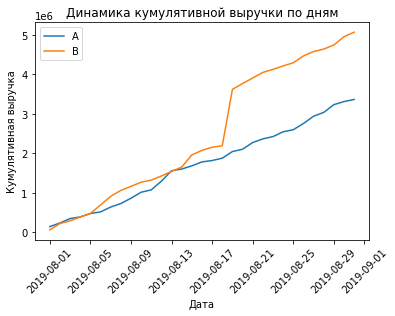

In [15]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation = 45)

plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Динамика кумулятивной выручки по дням')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в одной из точек резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Проверим это позже.

## График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

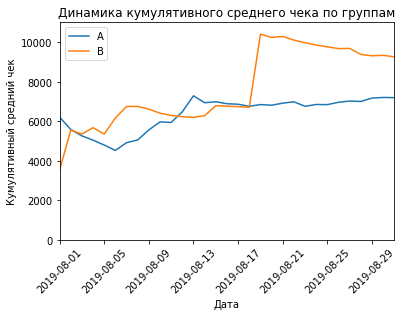

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 11000])
plt.legend()

plt.xticks(rotation = 45)

plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.title('Динамика кумулятивного среднего чека по группам')
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## График относительного изменения кумулятивного среднего чека B к A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 

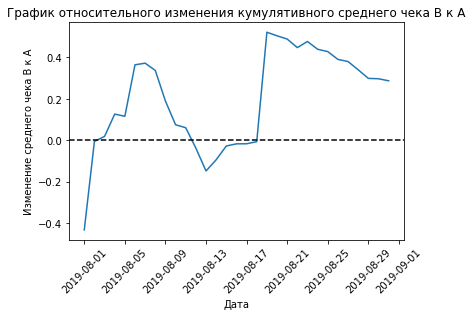

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation = 45)

plt.ylabel('Изменение среднего чека B к A')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека B к A')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

## График кумулятивной конверсии по группам

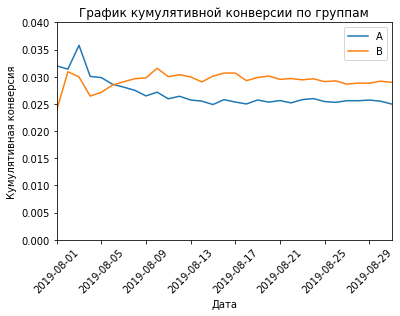

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.04])

plt.xticks(rotation = 45)

plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.title('График кумулятивной конверсии по группам')
plt.show()

По графику накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A. Начиная с 4 августа вверх берет группа В и стабилизируется к середине теста.

## График относительного изменения кумулятивной конверсии B к A

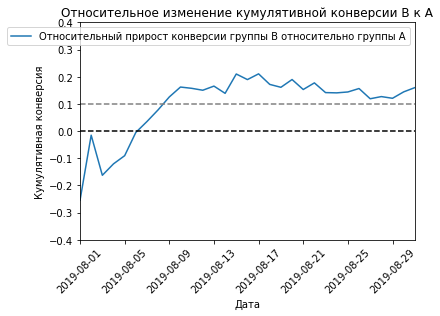

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
#plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6])
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.4, 0.4])

plt.xticks(rotation = 45)

plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивной конверсии B к A')
plt.show()

Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала. В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. После некоторых скачков, прирост конверси выровнялся и зафиксировался на относительно одном уровне.

## Точечный график количества заказов по пользователям

      visitorId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


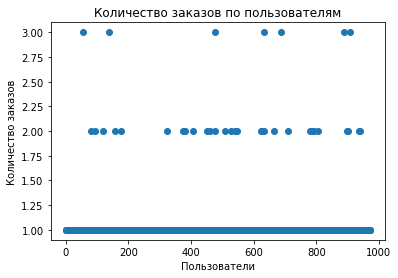

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Количество заказов по пользователям')
plt.show()

В основном пользователи делают 1 заказ, меньшее кол-во поьзователей делает 2 заказа, но их все же много. Есть выбросы где пользователи делают 8,9, 11 заказов. По графику можно выбрать границу аномальных заказов между 2 и 4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Чтобы ответить на этот вопрос, посчитаем выборочные перцентили количества заказов на одного пользователя.

## 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляли больше чем 1 заказ. И всего 1% пользователей заказывали более двух раз.
Разумно выбрать 1 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся позже.

## Точечный график стоимостей заказов

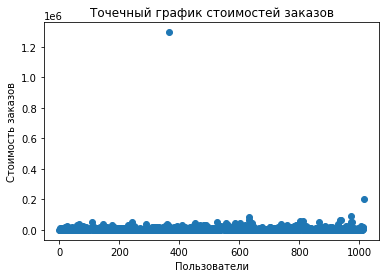

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])


plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователи')
plt.title('Точечный график стоимостей заказов')
plt.show()


Видим несколько выбросов, значительно выше средней стоимости заказов. Посмотрим более детально распределение на более крупном масштабе:

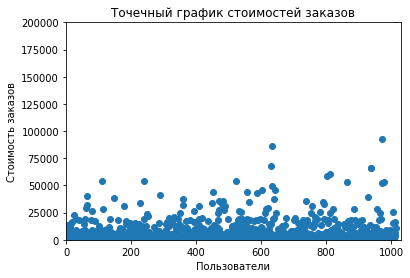

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1030, 0, 200000])

plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователи')
plt.title('Точечный график стоимостей заказов')
plt.show()


Визуально можем оценить, что большинство заказов не превышет стоимость между 25 и 50 тысячами. Проверим, какое относительное количество заказов приходится на заказы, дороже этих цифр. Посчитаем 95 и 99 перцентили.

## 95-й и 99-й перцентили стоимости заказов

Определим 95 и 99 перцентили стоимости заказа выборке:


In [24]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Можем взять в качестве границы аномальных значений показатель 26 785 руб, соответствующий 95-му перцентилю.

## Стат. значимость различий в конверсии между группами по «сырым» данным

Так как у нас есть значительные (по сравнению с нормальным распределением) выбросы в данных, стоит применить  тест, основанный на структурном подходе (непараметрический). Для расчетов возьмем U-критерий Манна-Уитни.

Сформулируем нулевую гипотезу: Статистически значимых различий в конверсии между группами по "сырым" данным нет. Установим порог значимости в 0,05.

Для наглядности расчетов создадим таблицу с дневными показателями количества заказов, выручки и количества посетителей в разбивке по группам, а также накопительный итог на каждый день по этим показателям.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [26]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп 
# будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Выведем относительный прирост среднего числа заказов группы B: 
# среднее число заказов группы B / среднее число заказов группы A - 1. Округлим до трёх знаков после запятой.

print("Относительное различие группы B и A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.011
Относительное различие группы B и A: 0.160


Значение p-value значительно меньше порога в 0,05, следовательно нулевую гипотезу мы отвергаем. Показатели конверсии по группам разнятся - их относительное различие достигает 16 процентов.

##  Стат. значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую гипотезу: Статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [27]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие группы B и A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное различие группы B и A: 0.287


Первое число — p-value = 0.829 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Относительный выигрыш группы B относительно А равен 28,7%.

Посчитаем количество "аномальных" покупателей (количество заказов больше 1, а сумма заказов больше 26785).

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


Всего 86 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

## Стат. значимость различий в конверсии между группами по «очищенным» данным

Сформулируем нулевую гипотезу: Статистически значимых различий в конверсии между группами по "очищенным" данным нет

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:


In [30]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие группы B и A: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.016
Относительное различие группы B и A: 0.174


Значение P-value по прежнему меньше 0,05. Относительное различие по конверсии немного увеличилось - с 16 до 17,4 процентов. Так как это очищенные данные, то мы можем с большей вероятностью утверждать, что эти различия имеют статистическую значимость.

##  Стат. значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую гипотезу: Статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет

In [31]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие группы B и A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)



P-value: 0.727
Относительное различие группы B и A: -0.034


Как и в случае с "сырыми" данными показатель P-value значительно больше 0,05, а значит мы не можем отвергнуть нулевую гипотезу. Однако стоит отметить изменение относительной разницы между группами - теперь группа В вместо выигрыша 28 процентов - даже проигрывает 3 процента другой группе. Следовательно, статистической разницы между исследуемых групп нет.

# Выводы по результатам A/B теста

В ходе проекта мы подготовили данные, полученные в результате АВ-теста, очистили их от пользователей, оказавшихся одновременно в двух группах. Расставили гипотезы по приоритетам и проверили основные показатели по выручке, среднему чеку и конверсии, чтобы сделать выводы об успешности проведенного теста.

Были приоритизированы имеющиеся гипотезы по двум фреймворкам - ICE и RICE. В итоге гипотеза, имеющая максимальный показатель охвата (reach) получила больший приоритет и выбрана в качестве основной.

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. Были некоторые скачки на графиках выручки и среднего чека, связанные с выбросами - крупными заказами. Однако после очистки от аномальных пользователей, ситуация поменялась - относительная разница между средними чеками стала минимальна. 

До и после очистки данных, показатель конверсии в группе B больше чем в группе A - с 16% до 17,3% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать успешные показатели группы B.